In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import pinv
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# define target functoin
def f(x1, x2):
    return np.sign(x1**2 + x2**2 - 0.6)

In [3]:
def prepare_sample(seed = None):
    np.random.seed(seed)
    x1 = 2*np.random.random(1000)-1
    x2 = 2*np.random.random(1000)-1
    y = f(x1, x2)
    flip = np.sign(np.random.random(1000)-0.1)
    y = flip*y
    return np.array([np.zeros(1000)+1,x1, x2]), y

In [4]:
def linear_regression(x, y):
    pinvX = np.linalg.pinv(x)
    return np.dot(y, pinvX)

In [5]:
def transform(x):
    return np.array([x[0], x[1], x[2], x[1]*x[2], x[1]**2, x[2]**2])

In [6]:
def E(g, y):
    return 1-np.average(g==y)

# Problem 13

0.503475


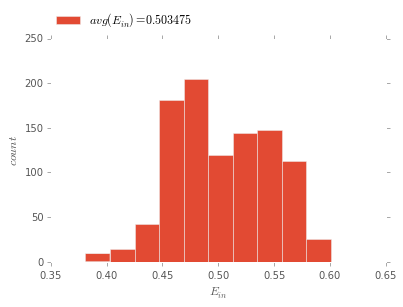

In [7]:
E_in_1 = []
for i in xrange(1000):
    x, y = prepare_sample(i)
    #plt.plot(x[1][y==1], x[2][y==1],".")
    #plt.plot(x[1][y==-1], x[2][y==-1],".")
    #plt.show()
    w = linear_regression(x, y)
    g = np.sign(np.dot(w, x))
    e = E(g ,y)
    E_in_1.append(e)
    #plt.plot(x[1][g==1], x[2][g==1],".")
    #plt.plot(x[1][g==-1], x[2][g==-1],".")
    #plt.show()
print np.average(E_in_1)
plt.hist(E_in_1, label = r"$avg(E_{{in}}) = {0}$".format(np.average(E_in_1)) )
plt.xlabel(r"$E_{in}$")
plt.ylabel(r"$count$")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.savefig("13")
plt.show()

# Problem 14

In [8]:
visual = False
E_out_2 = []
w3 = []
for i in xrange(1000):
    x, y = prepare_sample(i)
    x_test, y_test = prepare_sample()
    x = transform(x)
    x_test = transform(x_test)
    
    w = linear_regression(x, y)
    w3.append(w[3])
    g = np.sign(np.dot(w, x_test))
    e = E(g ,y_test)
    E_out_2.append(e)
    if visual:
        plt.plot(x_test[1][y_test==1], x_test[2][y_test==1],".")
        plt.plot(x_test[1][y_test==-1], x_test[2][y_test==-1],".")
        plt.show()
        plt.plot(x_test[1][g==1], x_test[2][g==1],".")
        plt.plot(x_test[1][g==-1], x_test[2][g==-1],".")
        plt.show()

-0.00133077541287


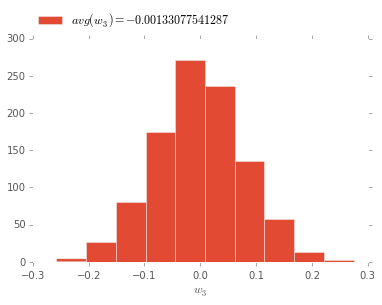

In [9]:
print np.average(w3)
plt.hist(w3, label = r"$avg(w_3) = {0}$".format(np.average(w3)))
plt.xlabel(r"$w_3$")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.savefig("14")
plt.show()

# Problem 15

0.1262


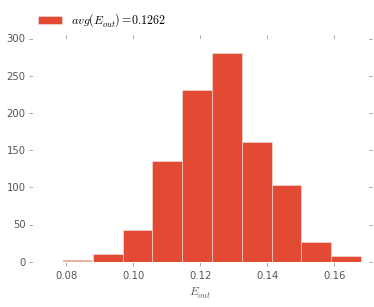

In [10]:
print np.average(E_out_2)
plt.hist(E_out_2, label = r"$avg(E_{{out}}) = {0}$".format(np.average(E_out_2)) )
plt.xlabel(r"$E_{out}$")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.savefig("15")
plt.show()